<a href="https://colab.research.google.com/github/APonceM/APonceM/blob/main/Indicadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis técnico

Vamos a calcular algunos indices de medias moviles de una menú de acciones

## Obtener los datos

Obtendremos los datos de un instrumentos con yahoo finance y los convertiremos en dataframe de pandas

In [ ]:
!pip install yahoo_fin

In [ ]:
from yahoo_fin.stock_info import get_data
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

amzn= get_data("amzn", start_date="01/01/2021", end_date="18/09/2022", index_as_date = True, interval="1d")
amzn=amzn.iloc[::-1]
#amzn=amzn.reindex(list(range(len(amzn))))
amzn

,open,high,low,close,adjclose,volume,ticker
2022-09-16,122.779999,123.870003,120.699997,123.529999,123.529999,115612500,AMZN
2022-09-15,127.379997,130.369995,125.500000,126.279999,126.279999,52887200,AMZN
2022-09-14,127.360001,128.839996,126.330002,128.550003,128.550003,45316800,AMZN
2022-09-13,131.009995,131.399994,126.269997,126.820000,126.820000,72694000,AMZN
2022-09-12,134.100006,136.490005,134.000000,136.449997,136.449997,53826900,AMZN
...,...,...,...,...,...,...,...
2021-01-08,159.000000,159.531998,157.110001,159.134995,159.134995,70754000,AMZN
2021-01-07,157.850006,160.427002,157.750000,158.108002,158.108002,70290000,AMZN
2021-01-06,157.324005,159.875504,156.557999,156.919006,156.919006,87896000,AMZN
2021-01-05,158.300507,161.169006,158.253006,160.925507,160.925507,53110000,AMZN


El resaultado es un dataframe de pandas.

Ahora calculemos las medias moviles con el precio de cierre


In [ ]:
cierre=amzn['close']
cierre.head(12)

2022-09-16    123.529999
2022-09-15    126.279999
2022-09-14    128.550003
2022-09-13    126.820000
2022-09-12    136.449997
2022-09-09    133.270004
2022-09-08    129.820007
2022-09-07    129.479996
2022-09-06    126.110001
2022-09-02    127.510002
2022-09-01    127.820000
2022-08-31    126.769997
Name: close, dtype: float64

### SMA
Media movil simple 



In [ ]:
n=len(cierre)

medias_12=[]
for i in range(n):
  if i+12>n:
    medias_12.append(cierre[i:].mean())
  else:
    medias_12.append(cierre[i:i+12].mean())

medias_24=[]
for i in range(n):
  if i+24 > n:
    medias_24.append(cierre[i:].mean())
  else:
    medias_24.append(cierre[i:i+24].mean())



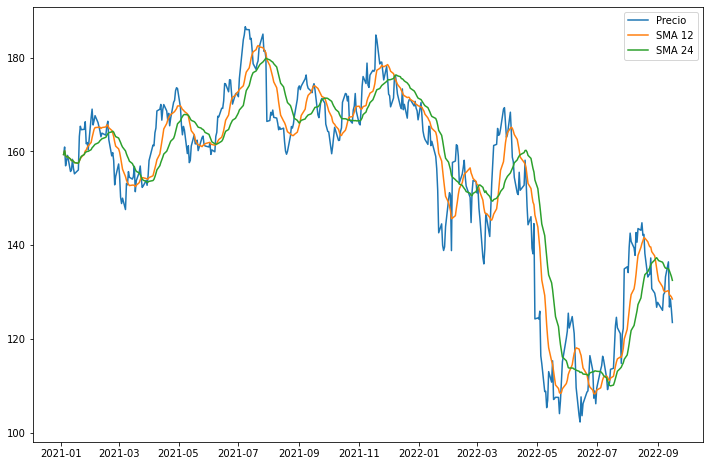

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))#Creamos una figura que contendrá nuestra gráfica
ax.plot(amzn.index,cierre) #Imprimimos los primeros 20 registros de los datos
ax.plot(amzn.index,medias_12)
ax.plot(amzn.index,medias_24)

ax.legend(["Precio","SMA 12","SMA 24"])

### WMA
Media movil ponderada

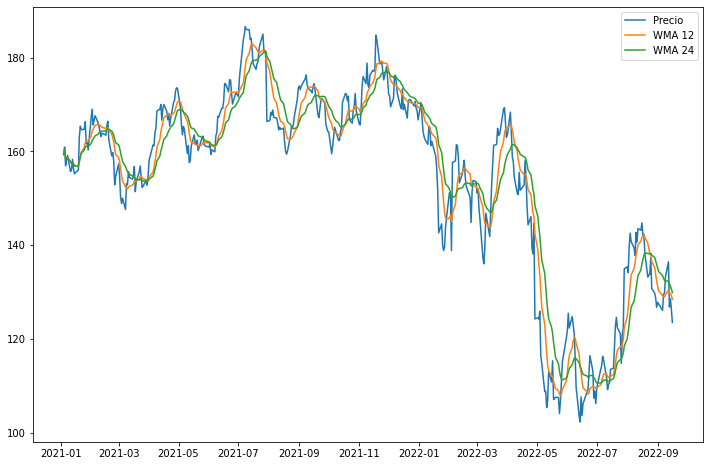

In [ ]:
import numpy as np

n=len(cierre)

medias_12=[]
for i in range(n):
  if i+12>n:
    k=n-i
    medias_12.append(2/(k*(k+1))*np.dot(list(range(k,0,-1)),cierre[i:]))
  else:
    medias_12.append((1/78)*np.dot(list(range(12,0,-1)),cierre[i:i+12]))
    
medias_24=[]
for i in range(n):
  if i+24>n:
    k=n-i
    medias_24.append(2/(k*(k+1))*np.dot(list(range(k,0,-1)),cierre[i:]))
  else:
    medias_24.append((1/300)*np.dot(list(range(24,0,-1)),cierre[i:i+24]))


fig, ax = plt.subplots(figsize=(12,8))#Creamos una figura que contendrá nuestra gráfica
ax.plot(amzn.index,cierre) #Imprimimos los primeros 20 registros de los datos
ax.plot(amzn.index,medias_12)
ax.plot(amzn.index,medias_24)
ax.legend(["Precio","WMA 12","WMA 24"])

### EMA 
Media movil exponencial

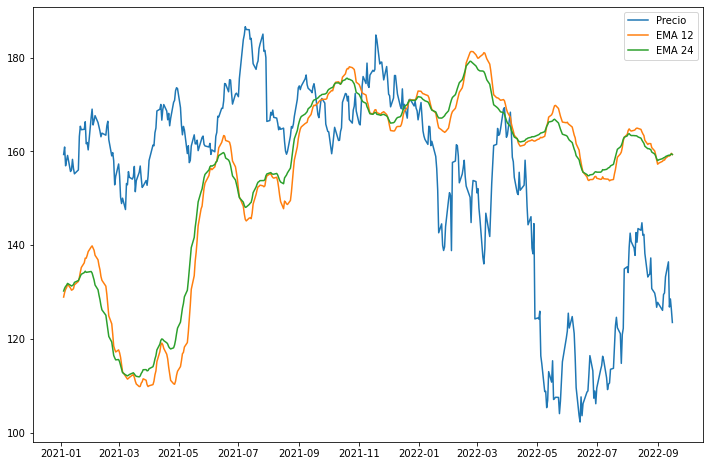

In [ ]:
n=len(cierre)

medias_12=[]
k=2/(12+1)
ema0=cierre[n-1]

for i in range(n-1,-1,-1):
  ema1=cierre[i]*k+ema0*(1-k)
  ema0=ema1
  medias_12.append(ema1)
  

ema0=cierre[n-1] 
medias_24=[]
k=2/(24+1)
for i in range(n-1,-1,-1):
  ema1=cierre[i]*k+ema0*(1-k)
  ema0=ema1
  medias_24.append(ema1)

fig, ax = plt.subplots(figsize=(12,8))#Creamos una figura que contendrá nuestra gráfica
ax.plot(amzn.index,cierre) #Imprimimos los primeros 20 registros de los datos
ax.plot(amzn.index,medias_12)
ax.plot(amzn.index,medias_24)
ax.legend(["Precio","EMA 12","EMA 24"])

### VWMA

Media movil ponderada por volumen

In [ ]:
volumen=amzn['volume']
volumen.head(12)

2022-09-16    115612500
2022-09-15     52887200
2022-09-14     45316800
2022-09-13     72694000
2022-09-12     53826900
2022-09-09     49387600
2022-09-08     43988500
2022-09-07     47900300
2022-09-06     43888600
2022-09-02     57378500
2022-09-01     56636100
2022-08-31     53648700
Name: volume, dtype: int64

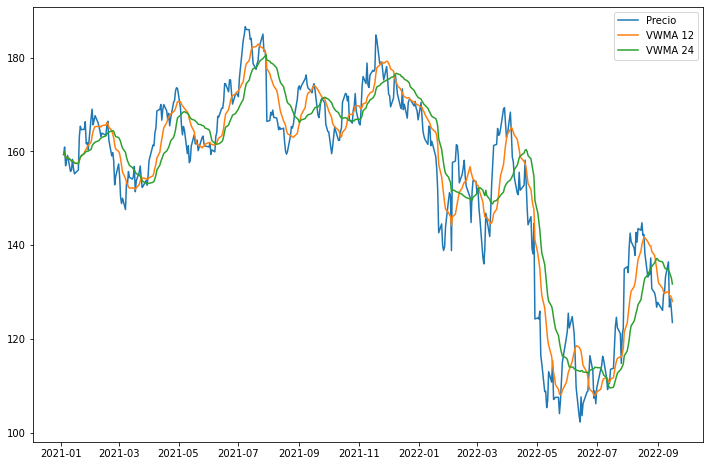

In [ ]:
n=len(cierre)

medias_12=[]
for i in range(n):
  if i+12>n:
    k=n-i
    medias_12.append(1/(volumen[i:].sum())*np.dot(volumen[i:],cierre[i:]))
  else:
    medias_12.append((1/(volumen[i:i+12].sum()))*np.dot(volumen[i:i+12],cierre[i:i+12]))
    
medias_24=[]
for i in range(n):
  if i+24>n:
    k=n-i
    medias_24.append(1/(volumen[i:].sum())*np.dot(volumen[i:],cierre[i:]))
  else:
    medias_24.append((1/(volumen[i:i+24].sum()))*np.dot(volumen[i:i+24],cierre[i:i+24]))


fig, ax = plt.subplots(figsize=(12,8))#Creamos una figura que contendrá nuestra gráfica
ax.plot(amzn.index,cierre) #Imprimimos los primeros 20 registros de los datos
ax.plot(amzn.index,medias_12)
ax.plot(amzn.index,medias_24)
ax.legend(["Precio","VWMA 12","VWMA 24"])

### MACD


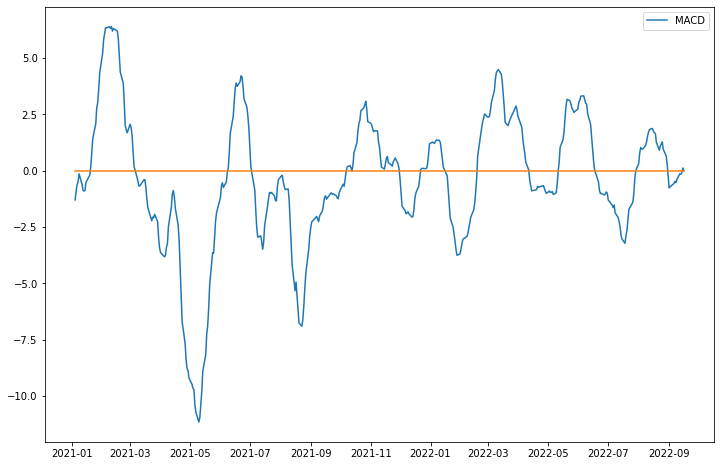

In [ ]:
n=len(cierre)

medias_12=[]
k=2/(12+1)
ema0=cierre[n-1]

for i in range(n-1,-1,-1):
  ema1=cierre[i]*k+ema0*(1-k)
  ema0=ema1
  medias_12.append(ema1)
  

ema0=cierre[n-1] 
medias_24=[]
k=2/(24+1)
for i in range(n-1,-1,-1):
  ema1=cierre[i]*k+ema0*(1-k)
  ema0=ema1
  medias_24.append(ema1)

macd=np.array(medias_12)-np.array(medias_24)

fig, ax = plt.subplots(figsize=(12,8))#Creamos una figura que contendrá nuestra gráfica
#ax.plot(amzn.index,cierre) #Imprimimos los primeros 20 registros de los datos
#ax.plot(amzn.index,medias_12)
#ax.plot(amzn.index,medias_24)
ax.plot(amzn.index,macd)
ax.plot(amzn.index,[0 for i in range(len(volumen))])
ax.legend(["MACD"])